# For the whole structure of files please read EDA _2_README_Introduction_1.ipynb
## Graphical exploration for hypotheses 3: The number of floors should have a negative impact on the price of the house: the more floors relative to the living area, the lower the selling price should be
  * Additional variables are created or renamed and some graphical explorations are performed

##### Getting data

In [30]:
# definitions
with open("0_definitions.py") as file:
    exec(file.read())

In [31]:
df_eda = pd.read_csv("eda5.csv",)
df_eda = df_eda.drop(df_eda.columns[0], axis=1)
df_eda.head() 

,date_sold,Price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,Bedrooms per 100 sqm (Living Area),Bedrooms per 100 sqm (Lot Area),bedrooms_100,Year house being sold,Diff. time sold and constructed,Year of counstruction
0,2014-12-09,6.040,2487200875,4,4,3,1960.0,5000.0,1,0,...,47.5208,-122.393,1360.0,5000.0,2.196717,0.014220,Medium (2-3),2014,49.0,1961-1990
1,2015-02-18,5.100,1954400510,5,3,2,1680.0,8080.0,1,0,...,47.6168,-122.045,1800.0,7503.0,1.922128,0.011060,Medium (2-3),2015,28.0,1961-1990
2,2014-05-12,12.300,7237550310,6,4,4,5420.0,101930.0,1,0,...,47.6561,-122.005,4760.0,101930.0,0.794385,0.006856,Low (1-2),2014,13.0,1900-2015
3,2015-04-15,2.295,2414600126,9,3,1,1780.0,7470.0,1,0,...,47.5123,-122.337,1780.0,8113.0,1.814143,0.005219,Medium (2-3),2015,55.0,1931-1960
4,2015-03-12,3.230,3793500160,10,3,2,1890.0,6560.0,2,0,...,47.3684,-122.031,2390.0,7570.0,1.708558,0.009831,Medium (2-3),2015,12.0,1900-2015


##### Some extra variables for EDA

##### Ratio of floor numbers to squared meter 

In [ ]:
 
df_eda['num_floors_for_100sqlivmeter']=(df_eda["floors"]/(df_eda["sqft_living"]*0.092903))*100
df_eda.head() 

In [15]:
#### changing data format and building time between house being sold and constructed

## Checking for correlation between year sold year constructed and their difference 

Text(95.58159722222221, 0.5, 'Features')

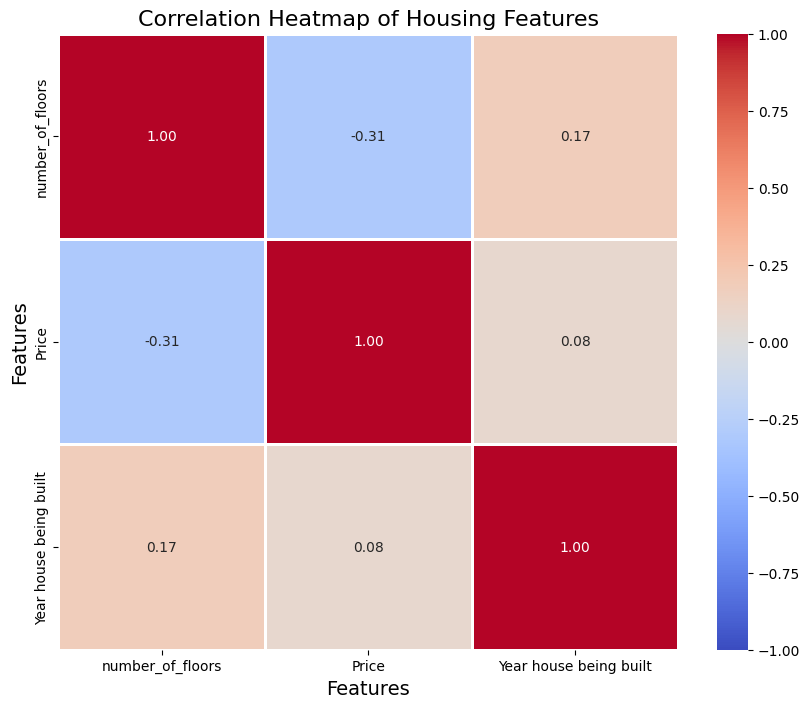

In [16]:
new_column_names = {
    'num_floors_for_100sqlivmeter': 'number_of_floors',
    'price': 'Price',
    'yr_built': 'Year house being built',
}

# Rename columns in the DataFrame
df_eda.rename(columns=new_column_names, inplace=True)

# Define the list of columns for correlation
num_question = list(new_column_names.values())  # Use the new column names

# Plotting the heatmap
plt.figure(figsize=(10, 8), dpi=100)
heatmap = sns.heatmap(
    data=df_eda[num_question].corr(),  # Compute correlation matrix for specified columns
    cmap='coolwarm',                  # Color map
    linecolor='white',                # Color of lines that separate cells
    linewidth=1,                      # Width of lines that separate cells
    annot=True,                       # Annotate cells with correlation coefficients
    vmin=-1,                          # Minimum value of the color scale
    vmax=1,                           # Maximum value of the color scale
    fmt='.2f'                         # Format annotations to 2 decimal places
)

# Adding labels and title
plt.title('Correlation Heatmap of Housing Features', fontsize=16)  # Title with larger font size
plt.xlabel('Features', fontsize=14)            # X-axis label with larger font size
plt.ylabel('Features', fontsize=14)            # Y-axis label with larger font size

<Axes: xlabel='floors', ylabel='Price'>

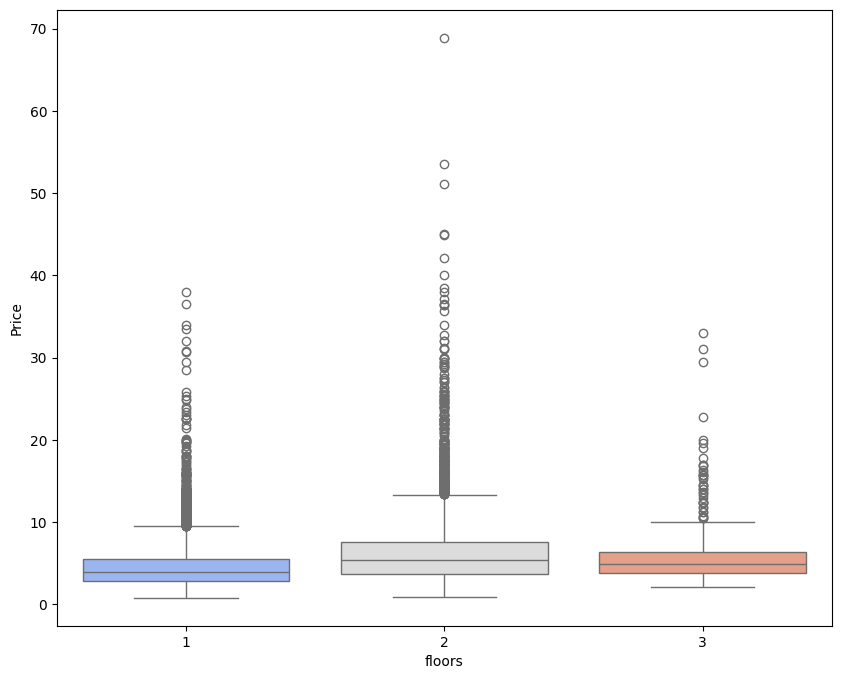

In [26]:
plt.figure(figsize=(10, 8), dpi=100)
sns.boxplot(
    x='floors',  # Binned categories
    y='Price',                # Variable to plot
    data=df_eda,              # Data source
    palette='coolwarm'        # Color palette for the boxplot
)

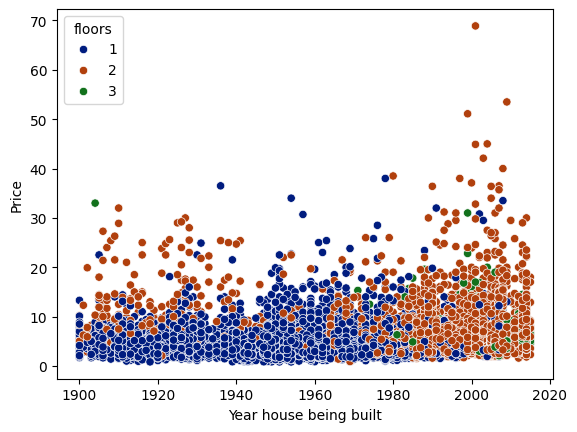

In [27]:
sns.scatterplot(data=df_eda, x='Year house being built', y='Price', 
                    hue='floors', palette='dark');